1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [10]:
import numpy as np
with open("2023_6/open_rank_20236.csv","r") as f:
    f.readline()
    data=f.readlines()
    values=[]
    for i in range(100):
        values.append(float(data[i].split(',')[2]))
    print("max",np.max(values))
    print("min",np.min(values))
    print("均值",np.mean(values))
    print("中位数",np.median(values))



max 1394.45
min 200.68
均值 346.9679
中位数 273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [11]:
with open("2022/activity_2022.csv","r") as f:
    f.readline()
    data=f.readlines()
    rates=[]
    for i in range(10):
        data[i]=data[i].split(',')
        rates.append(float(data[i][12])/float(data[i][1])-1)
    print("%-40s %s"%("repo","rate"))
    for i in range(10):
        print("%-40s %+f"%(data[i][0],rates[i]))

repo                                     rate
MicrosoftDocs/azure-docs                 -0.217727
NixOS/nixpkgs                            -0.031289
dotnet/runtime                           -0.260472
elastic/kibana                           -0.131413
firstcontributions/first-contributions   +0.044944
flutter/flutter                          -0.178227
home-assistant/core                      +0.033594
microsoft/vscode                         +0.228929
pytorch/pytorch                          +0.128273
rust-lang/rust                           -0.090981


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [43]:
with open("2022/china_2022.csv",'r') as f:
    head=f.readline().split(',')
    data=[i.split(',') for i in f.readlines()]
    cols=[]
    for i in range(9):
        cols.append([float(data[x][i+1]) for x in range(10)])
    print("china ",(" %14s"*9)%(*head[1:],),end='')
    print("min   ",(" %14f"*9)%(*[np.min(x) for x in cols],))
    print("max   ",(" %14f"*9)%(*[np.max(x) for x in cols],))
    print("mean  ",(" %14f"*9)%(*[np.mean(x) for x in cols],))
    print("median",(" %14f"*9)%(*[np.median(x) for x in cols],))
print('')
with open("2022/global_2022.csv",'r') as f:
    head=f.readline().split(',')
    data=[i.split(',') for i in f.readlines()]
    cols=[]
    for i in range(9):
        cols.append([float(data[x][i+1]) for x in range(10)])
    print("global",(" %14s"*9)%(*head[1:],),end='')
    print("min   ",(" %14f"*9)%(*[np.min(x) for x in cols],))
    print("max   ",(" %14f"*9)%(*[np.max(x) for x in cols],))
    print("mean  ",(" %14f"*9)%(*[np.mean(x) for x in cols],))
    print("median",(" %14f"*9)%(*[np.median(x) for x in cols],))


china    issue_comment     open_issue      open_pull review_comment    merged_pull           rank          value      rankDelta    valueDelta
min       11741.000000     752.000000    1823.000000    2113.000000    1165.000000       1.000000   12033.710000       0.000000    2329.360000
max      167814.000000   22397.000000   35266.000000   60402.000000   26732.000000      10.000000  103368.490000      25.000000   21093.110000
mean      61205.500000    9169.200000   16912.700000   19857.500000   13764.100000       5.500000   40269.534000       5.300000    9265.007000
median    39141.000000    6889.500000   15953.000000   10851.000000   13705.500000       5.500000   29789.235000       0.000000    9882.000000

global   issue_comment     open_issue      open_pull review_comment    merged_pull           rank          value      rankDelta    valueDelta
min       78530.000000   13162.000000   27414.000000   35072.000000   15418.000000       1.000000   71636.820000      -2.000000  -47388.580000


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [44]:
print(0.25*0.85/(0.25*0.85+0.75*0.1))

0.7391304347826088


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [45]:
print(0.5*0.35/(0.5*0.35+0.5*0.1))

0.7777777777777778


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

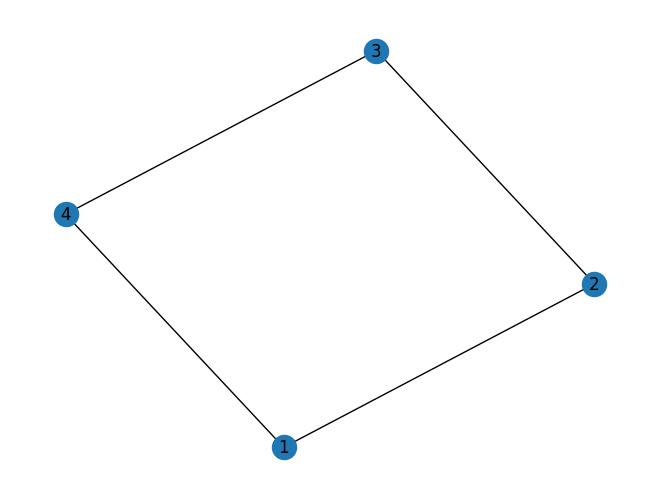

In [49]:
import networkx as nx
user=[1,2,3,4] 
edge=[(1,2),(2,3),(3,4),(4,1)]
G=nx.Graph(edge)
nx.draw(G,with_labels=True)

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

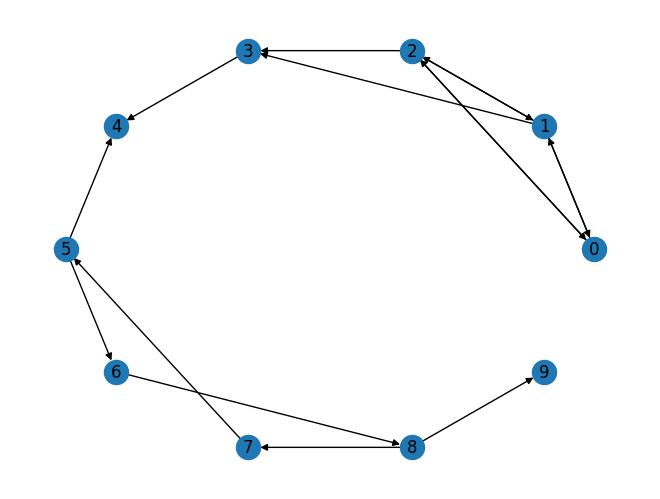

In [57]:
import networkx as nx
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),(2, 1), (1, 3), (2, 3), (3, 4), (5, 4),(5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]
G=nx.DiGraph(edges)
nx.draw(G,with_labels=True,pos=nx.circular_layout(G))

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

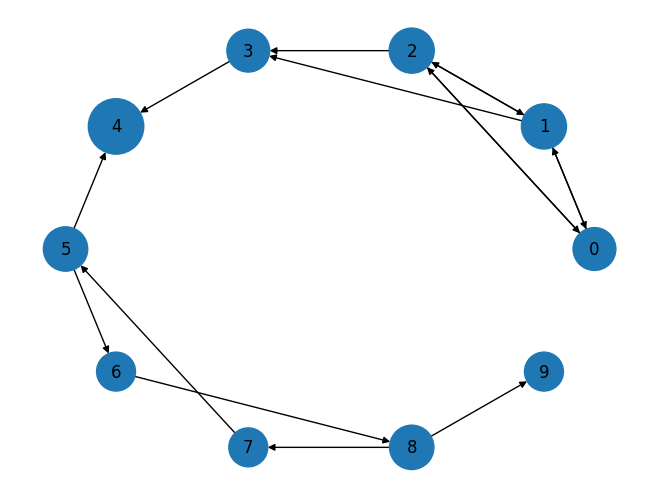

In [110]:
d=0.85
R=np.full(10,0.1)
M=np.zeros((10,10))
for j in range(10):
    if G.out_degree(j)==0:
        for i in range(10):
            M[i,j]=0.1
    else:
        for i in range(10):
            if (j,i) in G.edges:
                M[i,j]=1/G.out_degree(j)
while True:
    R_=M@R*d+(1-d)/10
    if abs(np.sum(np.abs(R-R_)))<0.000000001:
        break
    else:
        R=R_
nx.draw(G,with_labels=True,pos=nx.circular_layout(G),nodelist=list(range(10)),node_size=R_*10000)